# IMDB data analysis- Part 8- Analysis of Box Office and IMDB data- cont'd:

# This 2nd portion of the Mojo Box Office and IMDB data analysis will performing some exploratory data analysis using the revised dataset with all box office outliers deleted, in an attempt to more precisely answer questions about IMDB ratings, box office revenues, and genre vs IMDB ratings, etc. 

# More specifically, using the groupby() method and also via some box plots, some summary statistics will be displayed to show the average box office revenues per movie studio; IMDB ratings for each genre. 

# The code will also implement several scatter and regression plots to see correlations between some of the IMDB dataset variables (i.e., IMDB ratings; number of IMDB votes; and metascore) and box office revenue

# For reference: research questions that will be partly addressed in this notebook:

# Research questions: 1.) a.) Are higher box office earnings associated with higher ratings among movie critics or the general public, and/or do these films have higher average numebrs of IMDB ratings? 

# 1b.) More precisely, are average IMDB ratings, number of IMDB ratings, or metascore ratings associated with higher box office earnings, among these top 300 box office earners?  

# 2.) a.) How many films in the box office dataset were produced/distributed by each movie studio? What are the average IMDB ratings, number of IMDB ratings, and metascore ratings for each movie studio? Have these correlations changed over time?

# 3.)a.)  Are any particular movie studios performing better than others in any of these metrics? For example, which movie studio has the highest number of films among the highest box office earners? 

# 4.) a.) How many films are in box office dataset for each genre? In particular, what genres are the most represented among the top box office earners? 

# 4b.) Also, what is the average IMDB rating, number of IMDB votes, and metascores for each genre in the sample?

# Overview of Part VIII:


## Some of the plots and summary statistics from Part VII will be re-implemented (including a few extra statistics and visualizations) to examine the data after the outliers have been deleted). One type of plot that will not be in Part VII includes barplots (e.g., comparisons of IMDB ratings by movie studio). 

### In stark contrast to the original IMDB dataset, the IMDB data that was merged for this analysis has a much more uniform distribution in terms of both metascore and IMDB ratings. There are a few outliers of IMDB ratings below the median, but they do not lie drastically outside the quartiles of the data, so we will mostly ignore them for now.

# Import the merged box office/IMDB dataset that was revised to have none of the original box office revenue outliers

In [1]:
import pandas as pd
import seaborn as sns

imdb_box_office = pd.read_csv('imdb_box_office_merged_metascores.csv')

imdb_box_office

,Unnamed: 0,Rank,name,Studio,Adjusted Gross,Unadjusted Gross,year_x,year_y,length,genre,imdb_rating,n_votes,metascore
0,19,23,Fantasia,Disney,749882600,76408097,1941,1940,125,Animation,7.8,80637,96
1,20,24,Jurassic World,Universal,713814300,652270625,2015,2015,124,Action,7.0,526118,59
2,21,25,The Godfather,Paramount,712670800,134966411,1972,1972,175,Crime,9.2,1400345,100
3,22,26,Forrest Gump,Paramount,709890100,330252182,1994,1994,142,Drama,8.8,1560561,82
4,23,27,Mary Poppins,Disney,705981800,102272727,1964,1964,139,Comedy,7.8,136005,88
5,25,28,Grease,Paramount,696200000,189969103,1978,1978,110,Musical,7.2,203736,70
6,26,31,Thunderball,Universal_Artists,675444000,63595658,1965,1965,130,Action,7.0,93506,64
7,27,32,The Dark Knight,Warner_Bros,672789500,535234033,2008,2008,152,Action,9.0,2009298,84
8,28,33,The Jungle Book,Disney,665329600,141843612,1967,1967,78,Animation,7.6,147287,65
9,30,34,Sleeping Beauty,Disney,656264800,51600000,1959,1959,75,Animation,7.3,119347,85


## Data cleaning: delete unnamed and redundant columns

In [2]:
#delete 2 columns: 1st put both columns in a list
cols = ['Unnamed: 0', 'year_y']
#use drop method and call upon the cols list
imdb_box_office = imdb_box_office.drop(cols, axis=1)

imdb_box_office.head(10)

,Rank,name,Studio,Adjusted Gross,Unadjusted Gross,year_x,length,genre,imdb_rating,n_votes,metascore
0,23,Fantasia,Disney,749882600,76408097,1941,125,Animation,7.8,80637,96
1,24,Jurassic World,Universal,713814300,652270625,2015,124,Action,7.0,526118,59
2,25,The Godfather,Paramount,712670800,134966411,1972,175,Crime,9.2,1400345,100
3,26,Forrest Gump,Paramount,709890100,330252182,1994,142,Drama,8.8,1560561,82
4,27,Mary Poppins,Disney,705981800,102272727,1964,139,Comedy,7.8,136005,88
5,28,Grease,Paramount,696200000,189969103,1978,110,Musical,7.2,203736,70
6,31,Thunderball,Universal_Artists,675444000,63595658,1965,130,Action,7.0,93506,64
7,32,The Dark Knight,Warner_Bros,672789500,535234033,2008,152,Action,9.0,2009298,84
8,33,The Jungle Book,Disney,665329600,141843612,1967,78,Animation,7.6,147287,65
9,34,Sleeping Beauty,Disney,656264800,51600000,1959,75,Animation,7.3,119347,85


In [3]:
#rename year column
imdb_box_office.rename(columns = {'year_x':'year'}, inplace=True)
imdb_box_office.head(5)

,Rank,name,Studio,Adjusted Gross,Unadjusted Gross,year,length,genre,imdb_rating,n_votes,metascore
0,23,Fantasia,Disney,749882600,76408097,1941,125,Animation,7.8,80637,96
1,24,Jurassic World,Universal,713814300,652270625,2015,124,Action,7.0,526118,59
2,25,The Godfather,Paramount,712670800,134966411,1972,175,Crime,9.2,1400345,100
3,26,Forrest Gump,Paramount,709890100,330252182,1994,142,Drama,8.8,1560561,82
4,27,Mary Poppins,Disney,705981800,102272727,1964,139,Comedy,7.8,136005,88


# Re-implement summary statistics with no box office outliers

In [15]:
#summary stats of all numeric variables
imdb_box_office.describe()

,Rank,Adjusted Gross,Unadjusted Gross,year,length,imdb_rating,n_votes,metascore
count,236.000000,2.360000e+02,2.360000e+02,236.000000,236.000000,236.000000,2.360000e+02,236.000000
mean,165.406780,4.086519e+08,2.185621e+08,1994.055085,122.029661,7.262288,3.712911e+05,67.661017
std,79.609551,1.095633e+08,1.125682e+08,17.085303,24.745925,0.788897,3.353127e+05,15.592535
min,23.000000,2.806425e+08,2.365000e+07,1940.000000,70.000000,4.700000,1.226000e+04,28.000000
25%,98.750000,3.198772e+08,1.335197e+08,1982.000000,102.750000,6.700000,1.434518e+05,58.000000
50%,165.500000,3.807414e+08,2.080542e+08,1998.000000,120.000000,7.300000,2.822795e+05,67.000000
75%,234.250000,4.819464e+08,2.942856e+08,2007.000000,139.000000,7.800000,5.127105e+05,79.000000
max,300.000000,7.498826e+08,6.522706e+08,2017.000000,216.000000,9.200000,2.009298e+06,100.000000


# Among these 236 high-grossing box office films, how many did each studio make?

In [62]:
studio_count = imdb_box_office.groupby('Studio')['name'].count()

studio_count

Studio
 Universal_Artists         9
American_International     1
Buena_Vista               41
Columbia                   9
Disney                     8
DreamWorks                 8
Fox                       21
IFC                        1
Lionsgate                  4
MGM                        4
New_Line                   8
Newmarket                  1
Orion                      2
Paramount                 29
RKO                        2
Sony                      15
Summit_Entertainment       2
TriStar                    3
Universal                 24
WB_New_Line                4
Warner_Bros               40
Name: name, dtype: int64

## As shown earlier, Buena Vista has the highest number of films in this dataset, but Warner Bros is close behind, with only 1 less movie. Three other studios also distributed/produced more than 20 each, such as Fox, Paramount, and Universal.

## Several other studios distributed relatively few films (just 1-4), but Disney, Columbia, Dreamworks, Universal Artists, and New Line Cinema distributed a moderate 8-9 films each

## Which movie studios had the highest average adjusted gross box office earnings? Were these films higher in terms of metascore or IMDB ratings relative to the sample averages?

# Average IMDB ratings for each movie studio

In [211]:
avg_IMDB_studio = imdb_box_office.groupby('Studio')['imdb_rating'].mean()

avg_IMDB_studio

Studio
 Universal_Artists        7.455556
American_International    6.200000
Buena_Vista               7.426829
Columbia                  7.700000
Disney                    7.387500
DreamWorks                7.212500
Fox                       7.319048
IFC                       6.600000
Lionsgate                 7.000000
MGM                       8.100000
New_Line                  7.450000
Newmarket                 7.200000
Orion                     8.050000
Paramount                 7.255172
RKO                       7.700000
Sony                      6.960000
Summit_Entertainment      4.850000
TriStar                   6.900000
Universal                 6.745833
WB_New_Line               7.625000
Warner_Bros               7.335000
Name: imdb_rating, dtype: float64

In [226]:
#Calculate the median of IMDB ratings for each studio just to make sure the average and median IMDB ratings are not too far off mark
avg_IMDB_studio = imdb_box_office.groupby('Studio')['imdb_rating'].median()

avg_IMDB_studio

Studio
 Universal_Artists        7.20
American_International    6.20
Buena_Vista               7.50
Columbia                  7.70
Disney                    7.40
DreamWorks                7.15
Fox                       7.20
IFC                       6.60
Lionsgate                 6.95
MGM                       8.15
New_Line                  6.90
Newmarket                 7.20
Orion                     8.05
Paramount                 7.00
RKO                       7.70
Sony                      7.00
Summit_Entertainment      4.85
TriStar                   6.40
Universal                 6.65
WB_New_Line               7.60
Warner_Bros               7.35
Name: imdb_rating, dtype: float64

# Barplot: average IMDB ratings per movie studio

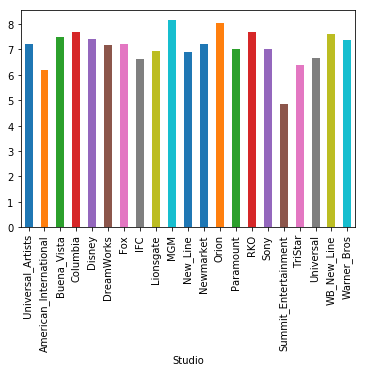

In [227]:
#show barplot comparing average IMDB ratings to make the comparisons more clear and visually appealing

avg_IMDB_studio.plot.bar()

## Overall, median and average IMDB ratings are similar, in some cases identical, for each movie studio. Two of the movie studios are nearly tied for the highest average IMDB rating: MGM holds the #1 spot, while Orion is just behind with 8.15 and 8.05 respectively. RKO also has fairly high IMDB ratings, at 7.7. Thus, for these 3 top-rated studios, their IMDB ratings for these high-grossing films actually exceed the overall IMDB sample average for either of the original samples, which each hovered a bit above 7. 

## By contrast, Summit Entertainment has an extremely low average IMDB rating of only 4.85, placing it far below this sample's average or that of the original IMDB datasets.

# How many films are in the dataset for each genre?

In [229]:
genre_count = imdb_box_office.groupby('genre')['imdb_rating'].count()
genre_count

genre
Action       94
Adventure    31
Animation    32
Biography     5
Comedy       37
Crime         3
Drama        27
Horror        4
Musical       1
Mystery       2
Name: imdb_rating, dtype: int64

## As shown earlier, with the summary stats, Action films are by far the most represented in this dataset. Four other genres have a fairly large number of films as well (although not nearly as many), with 27-37 each: Comedy, Adventure, Animation, and Drama.

## Each of the other 5 genres only have 1-5 films each in the dataset.

# Average IMDB rating for each genre

In [213]:
avg_IMDB_genre = imdb_box_office.groupby('genre')['imdb_rating'].mean()
avg_IMDB_genre

genre
Action       7.120213
Adventure    7.300000
Animation    7.518750
Biography    7.880000
Comedy       6.913514
Crime        8.200000
Drama        7.592593
Horror       7.650000
Musical      7.200000
Mystery      7.550000
Name: imdb_rating, dtype: float64

# Barplot: Average IMDB rating for each genre

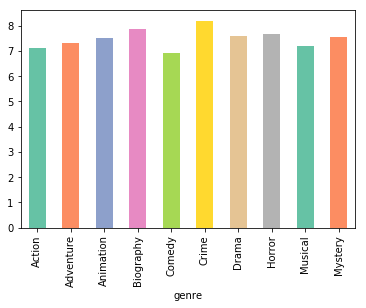

In [230]:
##reset color scheme for the plots using the bright pastel color set from seaborn: set2
sns.set_palette(sns.color_palette("Set2", 10))

#show barplot comparing average IMDB ratings to make the comparisons more clear and visually appealing
avg_IMDB_genre.plot.bar()

## Overall, Crime films have the highest IMDB ratings, but Biography, Animation, Drama, Horror, and Mystery films all have fairly high IMDB ratings as well. 

## Unlike the IMDB ratings by movie studio, none of the genres has an especially low average IMDB rating, with the lowest at about 6.91, which, if converted to a scale out of 100 points possible, would be only 3-5 points lower than the original IMDB dataset averages. 

# Are higher IMDB ratings associated with higher box office earnings (inflation-adjusted)?

## Implement scatter plot of IMDB ratings and (inflation) adjusted gross box office revenues

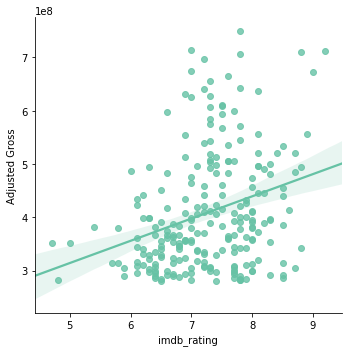

In [231]:
sns.lmplot(x='imdb_rating', y='Adjusted Gross', data=imdb_box_office)

# Show joint histogram and scatterplot of Adjusted Gross and IMDB rating, with Pearson r coefficient:

/Users/kevinallen/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


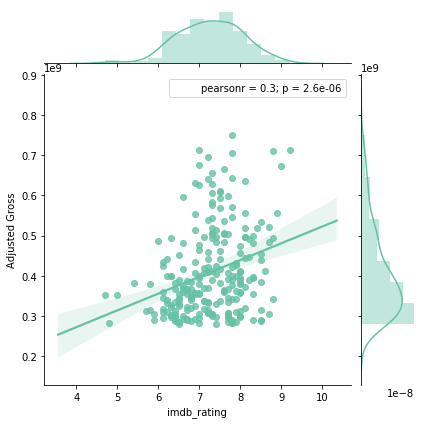

In [234]:
#import scipy library to  be able to call uppon statistics calculatons such as Pearson R
import scipy.stats as stats

#implement jointplot of IMDB rating and Adjusted Gross:
plot = sns.jointplot(x='imdb_rating', y='Adjusted Gross', data = imdb_box_office, kind = 'reg')

plot.annotate(stats.pearsonr)

## Notice there is a moderate positive correlation (of 30%) between IMDB ratings and adjusted gross box office earnings (inflation-adjusted). The correlation is slightly higher having eliminated the Adjusted Gross outliers.

## This provides a small amount of evidence that higher-grossing films, on average, have higher IMDB ratings, but the association between the 2 variables is not particularly strong. 

/Users/kevinallen/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


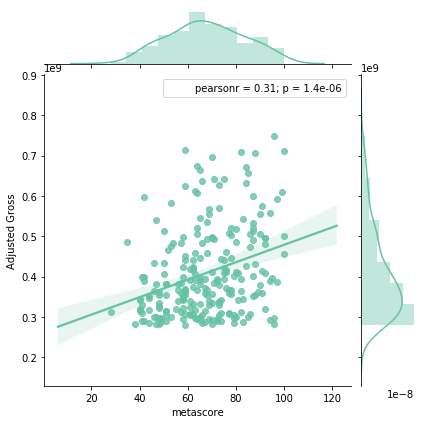

In [235]:
#implement jointplot of IMDB rating and Adjusted Gross:
plot = sns.jointplot(x='metascore', y='Adjusted Gross', data = imdb_box_office, kind = 'reg')

plot.annotate(stats.pearsonr)

## The correlation between metascores and Adjusted Gross box office earnings is similar to, but just slightly higher, than that between IMDB ratings and Adjusted Gross. There is a moderate positive correlation (of 31%) between metascores and adjusted gross box office earnings (inflation-adjusted). The correlation is again slightly higher having eliminated the Adjusted Gross outliers.

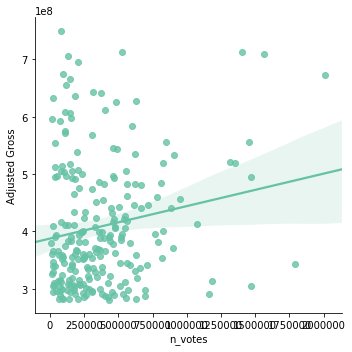

In [241]:
sns.lmplot(x='n_votes', y='Adjusted Gross', data=imdb_box_office)